In [1]:

# import module list is independent on respective file.
import yfinance as yf
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt



from datetime import datetime as dt
from datetime import date as date
from datetime import timedelta
from dateutil.relativedelta import relativedelta


from scipy.stats import mstats
import japanize_matplotlib



In [2]:

def folding_price_data(df, index2):
       


    DATA = pd.DataFrame({})


    for i in range(0,len(df), index2):

        try:
            temp = df.iloc[i:index2+i,:]
        except:
            temp = df.iloc[i:,:]
        M, m = max(temp["High"]), min(temp["Low"])
        open_p, close_p = temp['Open'].values[0], temp['Close'].values[-1]
        tp = pd.DataFrame({'Open':[open_p], 'High':[M], 'Low':[m], 'Close':[close_p]}, index=[temp.index.to_list()[0]])
        DATA = pd.concat([DATA, tp], axis=0)
        

    #DATA.index = df.query('@df.index.month % @index2== 0').index

    return DATA 


        

In [3]:
# 月時価格データおよび予測

predict = pd.read_csv("./prediction/" + 'USBond' + f"3mo.csv", index_col=0, parse_dates=True)
predict

,predict
2007-06-01,1.0
2007-09-01,1.0
2007-12-01,0.0
2008-03-01,0.0
2008-06-01,0.0
...,...
2022-09-01,1.0
2022-12-01,1.0
2023-03-01,1.0
2023-06-01,0.0


In [17]:
ticker =['IYR','RWR', 'XLRE','VNQ', 'SCHH']
price = yf.download(ticker, start='2011-09-01', end='2023-12-30', interval='1mo')

price

[*********************100%%**********************]  5 of 5 completed


Adj Close                                                  Close  \
                  IYR        RWR       SCHH        VNQ       XLRE        IYR   
Date                                                                           
2011-09-01  32.916210  36.819904   8.418417  30.952484        NaN  50.570000   
2011-10-01  37.659748  42.509869   9.728122  35.719513        NaN  57.240002   
2011-11-01  36.278111  40.828133   9.336678  34.361744        NaN  55.139999   
2011-12-01  37.376846  42.306229   9.757118  35.633495        NaN  56.810001   
2012-01-01  40.261250  45.440960  10.404542  38.326775        NaN  60.560001   
...               ...        ...        ...        ...        ...        ...   
2023-08-01  83.673706  88.095886  18.878096  80.592339  36.340626  85.339996   
2023-09-01  76.614288  81.104149  17.416122  74.018173  33.444763  78.139999   
2023-10-01  74.699097  78.141151  17.013338  72.031685  32.751621  75.330002   
2023-11-01  83.881538  86.569107  18.990484  80.734367  36.838154  84.589996   
2023-12-01  90.644432  94.069397  20.473343  87.283592  39.638371  91.410004   

                                                        ...       Open  \
                  RWR       SCHH        VNQ       XLRE  ...        IYR   
Date                                                    ...              
2011-09-01  56.500000  11.700000  50.869999        NaN  ...  57.060001   
2011-10-01  64.709999  13.420000  58.139999        NaN  ...  50.180000   
2011-11-01  62.150002  12.880000  55.930000        NaN  ...  55.720001   
2011-12-01  64.400002  13.460000  58.000000        NaN  ...  54.990002   
2012-01-01  68.489998  14.320000  61.700001        NaN  ...  57.740002   
...               ...        ...        ...        ...  ...        ...   
2023-08-01  90.089996  19.240000  82.379997  37.020000  ...  87.830002   
2023-09-01  82.940002  17.750000  75.660004  34.070000  ...  85.720001   
2023-10-01  79.180000  17.209999  72.919998  33.099998  ...  77.889999   
2023-11-01  87.720001  19.209999  81.730003  37.230000  ...  75.349998   
2023-12-01  95.320000  20.709999  88.360001  40.060001  ...  84.529999   

                                                           Volume           \
                  RWR       SCHH        VNQ       XLRE        IYR      RWR   
Date                                                                         
2011-09-01  64.010002  13.260000  57.500000        NaN  231594400  5316300   
2011-10-01  55.900002  11.585000  50.340000        NaN  243037900  7274800   
2011-11-01  63.060001  13.010000  56.349998        NaN  172846900  4101700   
2011-12-01  61.840000  12.845000  55.910000        NaN  116678700  7125800   
2012-01-01  65.720001  13.750000  59.049999        NaN  116124600  4256300   
...               ...        ...        ...        ...        ...      ...   
2023-08-01  92.760002  19.889999  85.040001  38.090000  122352100  6897700   
2023-09-01  90.639999  19.340000  82.900002  37.250000  126007700  6387400   
2023-10-01  82.769997  17.680000  75.410004  33.939999  193456000  5944900   
2023-11-01  79.269997  17.200001  73.019997  33.139999  153632200  6929400   
2023-12-01  87.620003  19.209999  81.660004  37.220001  163371000  6755400   

                                               
                 SCHH        VNQ         XLRE  
Date                                           
2011-09-01    2910400   54834000          NaN  
2011-10-01    7856000   60425700          NaN  
2011-11-01    5220200   40705700          NaN  
2011-12-01    3022200   34587700          NaN  
2012-01-01    6657600   37191500          NaN  
...               ...        ...          ...  
2023-08-01   60136200   89694300  108099400.0  
2023-09-01   68464400   86557300  102184800.0  
2023-10-01  100529400  140389100  172955100.0  
2023-11-01   79042000  104804000  131813900.0  
2023-12-01   59011000  107735600  120514500.0  

[148 rows x 30 columns]

In [7]:
price=price.swaplevel(0,1,axis=1).sort_index(axis=1)

In [16]:
data2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,56.290001,56.930000,56.250000,56.830002,36.340206,8221200
2011-01-04,57.000000,57.080002,55.560001,55.820000,35.694355,11275100
2011-01-05,55.639999,56.169998,55.599998,56.049999,35.841434,9167100
2011-01-06,56.139999,56.230000,55.619999,55.750000,35.649590,6797500
2011-01-07,55.900002,56.099998,55.230000,55.730000,35.636799,10495700
...,...,...,...,...,...,...
2023-06-23,83.019997,83.559998,82.220001,82.239998,80.634232,6717200
2023-06-26,82.300003,84.199997,82.180000,84.110001,82.467720,5030600
2023-06-27,84.419998,85.330002,83.870003,85.120003,83.458008,5045000


In [18]:

data2 = yf.download(ticker, start='2011-01-01', end='2023-06-30', interval='1d')
switch = 0
pd.set_option('display.max_rows', 10)


def get_nth_week(day):
    return (day - 1) // 7 + 1

def get_nth_dow(year, month, day):
    return get_nth_week(day), calendar.weekday(year, month, day)


def get_nth_dow_datetime(year, month, day):
    return get_nth_week(day), date(year, month, day).weekday()

def get_date_of_nth_dow(year, month, nth, dow):
    day = get_day_of_nth_dow(year, month, nth, dow)
    return dt.date(year, month, day) if day else None

# 12日(休日の場合は直後の平日)に決済、決済後の平日に新規購入        
count = 0
ticker_name='IYR'
data3 = data2.swaplevel(0,1,axis=1).sort_index(axis=1)[ticker_name]
for i, j in data3.iterrows():
    

    if i.month % 3 != 0:
        data3.loc[i, 'Trade'] =  0
        continue

    
    if switch == 1:
        switch += 1
        data3.loc[i, 'Trade'] =  2
        continue
    
    row, week_num = get_nth_dow_datetime(*[i.year, i.month, i.day])

    
    
    
    if (switch == 0) & (i.day>= 20):
        data3.loc[i, 'Trade'] =  1
        count = 0
        switch += 1

    elif i.day in range(1, 20):
        data3.loc[i, 'Trade'] =  0
        
        switch = 0
    
    else:
    
        data3.loc[i, 'Trade'] =  0
        pass
    
    
        
    
data2 = data3.fillna({"Trade": float(0)})
data2['year'], data2['month'] = data2.index.year, data2.index.month
data2.head(100)

[*********************100%%**********************]  5 of 5 completed


,Adj Close,Close,High,Low,Open,Volume,Trade,year,month
Date,,,,,,,,,
2011-01-03,36.340202,56.830002,56.930000,56.250000,56.290001,8221200,0.0,2011,1
2011-01-04,35.694359,55.820000,57.080002,55.560001,57.000000,11275100,0.0,2011,1
2011-01-05,35.841438,56.049999,56.169998,55.599998,55.639999,9167100,0.0,2011,1
2011-01-06,35.649609,55.750000,56.230000,55.619999,56.139999,6797500,0.0,2011,1
2011-01-07,35.636803,55.730000,56.099998,55.230000,55.900002,10495700,0.0,2011,1
...,...,...,...,...,...,...,...,...,...
2011-05-19,39.772335,61.660000,61.980000,61.250000,61.619999,5112300,0.0,2011,5
2011-05-20,39.365971,61.029999,61.660000,60.980000,61.450001,5737100,0.0,2011,5
2011-05-23,38.953152,60.389999,60.689999,60.290001,60.389999,10880900,0.0,2011,5


In [8]:
fold_index = 3
ticker='IYR'
price_and_predict = pd.concat([folding_price_data(price[ticker].loc["2010-03-01":"2023-06-01"], fold_index), predict.loc[:"2023-06-01",:]],axis=1)
price_and_predict

,Open,High,Low,Close,predict
2007-06-01,NaN,NaN,NaN,NaN,1.0
2007-09-01,NaN,NaN,NaN,NaN,1.0
2007-12-01,NaN,NaN,NaN,NaN,0.0
2008-03-01,NaN,NaN,NaN,NaN,0.0
2008-06-01,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...
2022-06-01,99.470001,103.360001,86.570000,94.260002,1.0
2022-09-01,93.769997,98.379997,75.660004,89.169998,1.0
2022-12-01,90.040001,96.019997,82.279999,87.070000,1.0
2023-03-01,86.419998,88.779999,78.110001,82.230003,1.0


In [53]:
price_and_predict.div(price_and_predict['Open'], axis=0).dropna(how='any').describe()

,Open,High,Low,Close,predict
count,31.0,31.000000,31.000000,31.000000,31.000000
mean,1.0,1.061161,0.927724,1.006381,0.016535
std,0.0,0.036872,0.069244,0.060323,0.013703
min,1.0,1.005073,0.672978,0.895554,0.000000
25%,1.0,1.031339,0.901051,0.951758,0.000000
50%,1.0,1.056929,0.939789,1.009961,0.022528
75%,1.0,1.087445,0.984272,1.048683,0.028215
max,1.0,1.149629,0.999664,1.145657,0.033557


In [ ]:
6.7% 6.4%

In [9]:
# graphization
def graph(df, save, file_name, simple_interest=False):
    if not simple_interest:
        
        print("利回り中心です。各y値は、総資産/初期資金です。")
        temp = df["interest"].values

        initial = df["Asset"][0] 
        lis = np.cumsum(temp) + initial

        profit_month =np.array(lis)  / initial
        
        # 月ごとのそれまでの最大資産の計算
        max_assets = pd.Series(profit_month).cummax().values
        
        total = profit_month
        
        # ドローダウンの計算
        dd = 1 - profit_month / max_assets
    else:
        print("単利計算です。各y値は、その時点までの各利率の累積です。")
        temp = df["Return"].values

        
        
        profit_month = np.array(temp)

        # 単利運用での資産額の計算
        total = 1 + np.cumsum(profit_month)

        # 月ごとのそれまでの最大資産の計算
        max_assets = pd.Series(total).cummax().values

        # ドローダウンの計算
        dd = max_assets - total
    
    # 最大ドローダウンの計算
    max_dd_percent = max(dd) * 100
    print(f'最大ドローダウン: {max_dd_percent:.3f} %')

    fig, ax1 = plt.subplots(figsize=(12, 7))
    ax2 = ax1.twinx()
    
    ax1.set_ylabel('資産額')
    ax1.plot(total, label='Total')
    ax1.plot(max_assets, label='max Total')
    ax1.legend()

    ax2.set_ylabel('Drawdown(％)')
    ax2.bar(np.arange(len(dd)), dd*100, alpha=0.5, color='pink', label='ドローダウン(％)')
    ax2.legend(loc='upper right')
    if save:
        fig.savefig(file_name+".png")

In [25]:


# 計算用

# ロスカットした際に所持金額が足りないとき
def Asset_initiated(initiate_asset, open_price, rate, next_month_open_price,totalreturn, ind):    

    # Losscut : open_price * (1-losscut_rate) > next_month_open_price
    string = str(ind) + " "
    
    if open_price * (1+ rate) > next_month_open_price:
        pass
    elif open_price * (1+ rate)+totalreturn > next_month_open_price:
        # if you trade off at all,sale price at the time + totalreturn > next month open price,then you can trade it freely.   
        pass
    else:
        # initiate asset is replaced.
        initiate_asset = next_month_open_price
        
        # string : ProfitLine -> "profit line is crossed."" Losscut -> "Losscut.""
        print(string + " And initiate asset is replaced.")
    
    return initiate_asset


# plはprofit and loss です.

def order_pl(data, losscut, profitline, losscut2, profitline2, predict):
    open_price = data.query('Trade==2')['Open'].values[0]
    open_price = float(open_price)
    skip_num = np.where(data['Trade'].values==2)[0][0]
    
    switch = 0
    # ↓not used
    return_value = 0
    data = data.iloc[skip_num:, :]
    try:
        exit_idxs = np.where(data['Trade'].values==1)[1]
    except:
        exit_idxs = np.where(data['Trade'].values==1)[0]
        
    if len(exit_idxs) > 0:
        # データに手仕舞い日以降のデータが含まれていたら削除
        data = data.iloc[:exit_idxs[-1]+1]
    string = "None"
    for i, temp in data.iterrows():

        high_to_open = temp["High"] - open_price
        open_to_low = open_price - temp["Low"]
        if predict == 0: 
            
            # sell order 

            perspective_maxloss = high_to_open 
            perspective_maxprofit = open_to_low
            
            losscut_rate = losscut2
            profit_rate = profitline2
            
            director = -1    
        else:           
            
            # buy order
            
            perspective_maxloss = open_to_low
            perspective_maxprofit = high_to_open
            director = 1
            
            losscut_rate = losscut
            profit_rate = profitline
            pass
        
        
        
        profit_secure = perspective_maxprofit >= open_price * profit_rate
        loss_cut = perspective_maxloss >= open_price * losscut_rate
        if (not profit_secure) and (not loss_cut):
            # 利確・損切に到達していないとき
            continue
        elif profit_secure and loss_cut:
            
            # まさかないとは思うが、、、日中でロスカットと利確ラインに到達したとき
            assert False, "TODO: 日中でロスカットと利確ラインに到達した場合の処理を書く"
        elif profit_secure:
            profit = open_price * profit_rate
            message = 'crossed'
            print("check : Profit Line is crossed.")
            return profit, message, open_price
        else: # loss_cut
            profit = -open_price * losscut_rate
            message = 'losscut.'
            print("check : Losscut.")
            return profit, message, open_price

    try:
        data.query('Trade==1')['Close'].values[-1]
    except:
        close_price = data['Close'].tail(1).values
        return_value =  close_price - open_price
        return_value *= director
    else:
        return_value = data.query('Trade==1')['Close'].values[-1] - open_price
        return_value *= director


    

    
    return (return_value, string, open_price)


def judge_message(message):
    if message == 'crossed':
        profitline, loss_cut = "crossed", "safe"
    elif message == 'losscut.':
        profitline, loss_cut = "not crossed", "Losscut."
    elif message != 'anomally':
        profitline, loss_cut = 'not crossed', 'safe'
    else:
        profitline, loss_cut = 'anomally', 'anomally'
    return (profitline, loss_cut)
    
def judge_count(message):
    if message == 'crossed':
        profitline, loss_cut = 1, 0
    elif message == 'losscut.':
        profitline, loss_cut = 0, 1
    else:
        profitline, loss_cut = 0, 0
    return (profitline, loss_cut)

# This code(function) yields to totalreturn_per_year_list and dataframe of whole trades.
# If variable option is not incerted,  option is void, or empty.(空白)
# data2 is price data per day.

def calc(data, losscut_rate, profitlevel, reverse, leverage,losscut2, profitlevel2, data2=data2):
    
    profit_count = 0 
    losscut_count = 0
    
    
    predicts = data["predict"].values
    # "reverse" were the opposite, then What score...?
    if reverse:
        predicts = [int(not num) for num in predicts] 
        print("(入力前の)シグナルが0なら買います。")
    else:
        # reverse_ind = 1
        print("(入力前の)シグナルが0なら売ります。")
    
    
    profitline= "not crossed"
    
    box = []
    totalreturn = 0
    Asset = 0
    
    loss_cut_sgn = "safe"
    profit_count = 0
    losscut_count = 0
    dic = {}
    df = pd.DataFrame()
    initiate_asset = data["Open"][0]
    
    
    for i,ind in enumerate(data.index) :       
        predict = predicts[i]
        
        year = int(ind.year)
        month = int(ind.month)
        
        # Example startが2011.7.12のとき、2011.7.1 ～ 2011.8.28までのデータを入手
        init = date(year, month, 1)
        
        # data2は日時データで一部をqueryで抜粋する。
        # ex.start : 2011.7のとき、intervalが1か月ならば、7月13日あたり(休日等考慮)に取引して、2011.8.12あたりに手じまいする。
        # となると, 2月が28日までなので、1か月先の8月28日まで入手する必要がある。
        
        end = date(year, month, 28) + relativedelta(months=6)
        tp = data2.query("Date >=@init & Date <=@end")
        try:
            tp = order_pl(tp, losscut_rate, profitlevel,losscut2, profitline2, predict)
        except Exception as e:
            print(e)
            continue
        
        
        interest = tp[0]
        message = tp[1]
        open_price = tp[2]
        
        profitline, loss_cut_sgn = judge_message(message)
        profit_count += judge_count(message)[0]
        losscut_count +=  judge_count(message)[1] 
        
        

        interest *= leverage
        totalreturn += interest
        Return = interest / open_price
        dic = {"signal":predict, "Return":Return, "totalreturn":totalreturn,"profitline":profitline,"loss_cut":loss_cut_sgn,"interest":interest, "open_price":open_price}
        temp = pd.DataFrame(dic, index=[ind])
        df = pd.concat([df,temp],axis=0)
        
        
        if ind.month == 12:
            box.append(totalreturn)
            
    print(f"loss_cut: {losscut_count}", f"profit_count: {profit_count}")
    print(f"totalreturn: {totalreturn}", f"initiate_asset:{initiate_asset}")
    

    
    return [box, df]
        

In [12]:
loss_cut2, profitline2 = 0.1, 0.1

In [33]:
from tqdm.notebook import tqdm
max_yield, tp1, sharp_ratio1, i1, j1 = 0, 0, 0, 0, 0
data =  price_and_predict.loc["2012-08-01":, :]


lis = []


for k in tqdm(range(2080, 2881, 100)):
    loss_cut = k * 0.01*0.01
    for j in range(516, 517, 1):       
        profitline = j * 0.01*0.01

        totalreturns, df = calc(
            data=data,
            losscut_rate=loss_cut, 
            profitlevel=profitline, 
            reverse=False,
            leverage=1, # 第４因数は、Falseの方がデフォです。
            losscut2=loss_cut2, 
            profitlevel2=profitline2, 
            data2=data2)  
        sharp_ratio = np.mean(df['Return']) /np.std(df['Return'], ddof=1)

        print(sharp_ratio*np.sqrt(4))
        lis.append(sharp_ratio*2)
        if sharp_ratio >= sharp_ratio1:

            last_losscut = loss_cut
            last_profitlevel = profitline



            sharp_ratio1 = sharp_ratio

for l in (range(914,915 , 5)):
    loss_cut2 = l*0.01*0.01
    for m in range(625, 626, 1):       
        profitline2 = m*0.01*0.01

        # data, losscut_rate, profitlevel, reverse, leverage,losscut2, profitline2, data2=data2

        totalreturns, df = calc(
            data=data,
            losscut_rate=last_losscut, 
            profitlevel=last_profitlevel, 
            reverse=False,
            leverage=1, # 第４因数は、Falseの方がデフォです。
            losscut2=loss_cut2, 
            profitlevel2=profitline2, 
            data2=data2)  
        sharp_ratio = np.mean(df['Return']) /np.std(df['Return'], ddof=1)

        print(sharp_ratio*np.sqrt(4))
        lis.append(sharp_ratio*2)
        if sharp_ratio >= sharp_ratio1:


            sell_last_losscut = loss_cut2
            sell_last_profitlevel = profitline2


            sharp_ratio1 = sharp_ratio
            




print(
    f"sell_last_losscut : {sell_last_losscut}",
    f"sell_last_profitlevel : {sell_last_profitlevel}",
    f"last_losscut　：{last_losscut}",   
    f"last_profitlevel : {last_profitlevel} ",
    f"sharpratio : {sharp_ratio1*np.sqrt(4)}",
    )  

  0%|          | 0/9 [00:00<?, ?it/s]

(入力前の)シグナルが0なら売ります。
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_14268\4112177944.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 30
totalreturn: [98.34006053] initiate_asset:65.51000213623047
0.9191616167187275
(入力前の)シグナルが0なら売ります。
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
ch

C:\Users\admin\AppData\Local\Temp\ipykernel_14268\4112177944.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 30
totalreturn: [98.34006053] initiate_asset:65.51000213623047
0.9191616167187275
(入力前の)シグナルが0なら売ります。
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
ch

C:\Users\admin\AppData\Local\Temp\ipykernel_14268\4112177944.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 30
totalreturn: [98.34006053] initiate_asset:65.51000213623047
0.9191616167187275
(入力前の)シグナルが0なら売ります。
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
ch

C:\Users\admin\AppData\Local\Temp\ipykernel_14268\4112177944.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 30
totalreturn: [98.34006053] initiate_asset:65.51000213623047
0.9191616167187275
(入力前の)シグナルが0なら売ります。
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
ch

C:\Users\admin\AppData\Local\Temp\ipykernel_14268\4112177944.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 30
totalreturn: [98.34006053] initiate_asset:65.51000213623047
0.9191616167187275
(入力前の)シグナルが0なら売ります。
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
ch

C:\Users\admin\AppData\Local\Temp\ipykernel_14268\4112177944.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 30
totalreturn: [98.34006053] initiate_asset:65.51000213623047
0.9191616167187275
(入力前の)シグナルが0なら売ります。
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
ch

C:\Users\admin\AppData\Local\Temp\ipykernel_14268\4112177944.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 30
totalreturn: [98.34006053] initiate_asset:65.51000213623047
0.9191616167187275
(入力前の)シグナルが0なら売ります。


C:\Users\admin\AppData\Local\Temp\ipykernel_14268\4112177944.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
ch

C:\Users\admin\AppData\Local\Temp\ipykernel_14268\4112177944.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 30
totalreturn: [98.34006053] initiate_asset:65.51000213623047
0.9191616167187275
(入力前の)シグナルが0なら売ります。
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
ch

C:\Users\admin\AppData\Local\Temp\ipykernel_14268\4112177944.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 30
totalreturn: [98.34006053] initiate_asset:65.51000213623047
0.9191616167187275
sell_last_losscut : 0.09140000000000001 sell_last_profitlevel : 0.0625 last_losscut　：0.28800000000000003 last_profitlevel : 0.0516  sharpratio : 0.9191616167187275


In [ ]:
sell_last_losscut : 0.08140000000000001 sell_last_profitlevel : 0.0542 last_losscut　：0.20800000000000002 last_profitlevel : 0.0542  sharpratio : 1.9188765063176192 2

In [25]:
"""
sell_last_losscut=0.0914
sell_last_profitlevel=0.0625
last_losscut=0.19955   
last_profitlevel=0.0516
""".replace('=', ':').split('\n')

['',
 'sell_last_losscut:0.0914',
 'sell_last_profitlevel:0.0625',
 'last_losscut:0.19955   ',
 'last_profitlevel:0.0516',
 '']

In [69]:
pd.DataFrame.from_dict({
'sell_last_losscut':[sell_last_losscut],
 'sell_last_profitlevel':[sell_last_profitlevel],
 'last_losscut':[last_losscut],
 'last_profitlevel':[last_profitlevel]
}, orient='columns').to_csv(f'data/crossline{ticker}.csv')

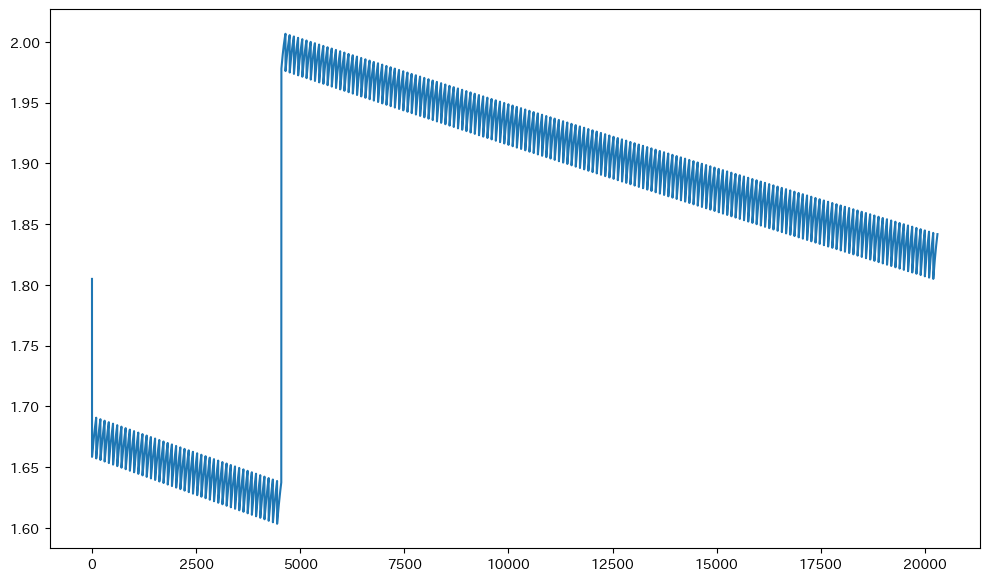

In [37]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(lis)

IYR
start:2011.1 ～ Losscut(%) 13 Profitline(%) 3 sharpratio : 2.026364372980049

RWR
start:2011.1 ～ Losscut(%) 13 Profitline(%) 3 sharpratio : 2.1506774319924284

XLRE¶
start:2015.10 ～ Losscut(%) 10 Profitline(%) 3 sharpratio : 2.1491427254600883

VNQ REIT指数でなく、不動産指標で、性質が少し異なる
start:2011.1 ～ Losscut(%) 12 Profitline(%) 3 sharpratio : 1.9552072952592134

SCHH REIT指数ではあるが、上記３つと性質が少し異なる
start:2011.1 ～ Losscut(%) 11 Profitline(%) 3 sharpratio : 2.097557524833007

In [37]:
data =  price_and_predict["2014-08-01":"2023-06-01"]


temp = calc(data, last_losscut, last_profitlevel, False, 1, sell_last_losscut, sell_last_profitlevel, data2)  # 第４因数は、Falseの方がデフォです。
totalreturns, df = temp[0], temp[1]
sharp_ratio = np.mean(df['Return']) /np.std(df['Return'], ddof=1)
print(f"sharp ratio : {sharp_ratio*np.sqrt(4)}")
#graph(df, True, f"./graph_image/"+ticker+f"graph_{ticker}2", True)

(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_14268\4112177944.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
loss_cut: 2 profit_count: 28
totalreturn: [116.23331411] initiate_asset:74.05000305175781
sharp ratio : 1.8368374155545466


In [40]:
df.to_csv(f'testdata/36912start{ticker[0]}.csv')

In [39]:
ticker

['IYR', 'RWR', 'XLRE', 'VNQ', 'SCHH']

In [ ]:
1=2 # Run all でここまで実行する。

In [ ]:
df

In [ ]:
start = 2015 # year

dic = {f"{start+i}.12":[j] for i,j in enumerate(totalreturns) }
df2 = df.set_index([df.index.year, df.index])
df2.index.names = ['year', 'date']
for i in range(12):
    df2.query('year==2011').sum()['interest']
dic2 = {f"{2015+i}.{12}":[f"{df2.query('year==@start+@i').sum()['Return']:.2f}"] for i in range(8) }

temp = pd.DataFrame(dic).rename({0:"累積資産額"})
temp2 = pd.DataFrame(dic2).rename({0:"yield"})
temp3 = pd.concat([temp,temp2])

temp3.T.to_csv('./tabledata/'+ticker+'table_3month.csv')
pd.set_option('display.max_row', None)
temp3.T

In [ ]:
def Evaluation(df):
    Sel = pd.Series()
    Sel['初期資金'] = df['open_price'][0]
    
    Sel["全トレード数"] = df.shape[0]
    #print((10**2) * df.query('interest >= 0').count() / df.shape[0])
    Sel["勝率"] = "{:.2f}%".format((10**2) * df.query('interest >= 0').shape[0] / df.shape[0])
    Sel["負率"] = "{:.2f}%".format((10**2)* df.query('interest < 0').shape[0] / df.shape[0])
    Sel["全トレード平均利益"] = df['interest'].mean()
    Sel["勝ちトレード平均利益"] =  df.query('interest >= 0')['interest'].mean()
    Sel["負けトレード平均利益"] =  df.query('interest < 0')['interest'].mean()
    
    Sel["プロフィットファクター"] = df.query('interest >= 0')['interest'].sum() / -df.query('interest < 0')['interest'].sum()
    
    display(pd.DataFrame(Sel))
    fig, ax = plt.subplots()
    ax.hist(df['interest'], bins=20, label='interest')
Evaluation(df.query('signal==0'))

In [60]:
df

,signal,Return,totalreturn,profitline,loss_cut,interest,open_price
2015-06-01,0.0,-0.008051,-0.247000,not crossed,safe,-0.247000,30.680000
2015-09-01,1.0,0.020535,0.382999,not crossed,safe,0.629999,30.680000
2015-12-01,1.0,0.050500,1.932339,crossed,safe,1.549340,30.680000
2016-03-01,1.0,0.050500,3.508949,crossed,safe,1.576610,31.219999
2016-06-01,1.0,0.050500,5.143634,crossed,safe,1.634685,32.369999
...,...,...,...,...,...,...,...
2022-06-01,1.0,0.050500,35.630238,crossed,safe,1.975560,39.119999
2022-09-01,1.0,0.050500,37.608323,crossed,safe,1.978085,39.169998
2022-12-01,1.0,0.050500,39.471167,crossed,safe,1.862844,36.888000
2023-03-01,1.0,0.008741,39.791167,not crossed,safe,0.320000,36.610001


C:\Users\admin\AppData\Local\Temp\ipykernel_14268\1833057311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predict']= [1 for i in range(len(data))]
C:\Users\admin\AppData\Local\Temp\ipykernel_14268\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


(入力前の)シグナルが0なら売ります。
loss_cut: 0 profit_count: 0
totalreturn: [20.14999771] initiate_asset:74.05000305175781
単利計算です。各y値は、その時点までの各利率の累積です。
最大ドローダウン: 9.140 %


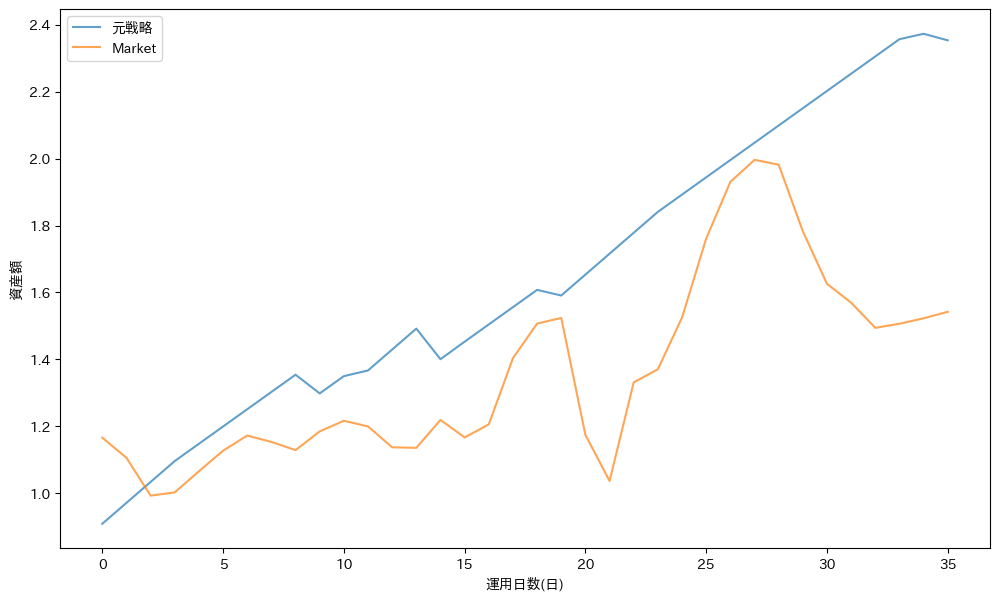

In [21]:

data['predict']= [1 for i in range(len(data))]
c, df3 = calc(data, 1, 1, False,1,1,1, data2)
def graph3(df, save, file_name, raw_data=df3, simple_interest=False):
    if not simple_interest:
        
        print("利回り中心です。各y値は、総資産/初期資金です。")
        temp, temp2 = df["interest"].values, raw_data["interest"].values

        initial = df["open_price"][0] 
        lis = np.cumsum(temp) + initial
        lis2 = np.cumsum(temp2) + initial
        
        
        profit_month =np.array(lis)  / initial
        profit_month2 =np.array(lis2)  / initial

        # 月ごとのそれまでの最大資産の計算
        max_assets = pd.Series(profit_month).cummax().values
        
        total = profit_month
        total2 = profit_month2

        
        # ドローダウンの計算
        dd = 1 - profit_month / max_assets
    else:
        print("単利計算です。各y値は、その時点までの各利率の累積です。")
        temp, temp2 = df["Return"].values, raw_data["Return"].values

        

        profit_daily = temp
        profit_daily2 = temp2


        # 単利運用での資産額の計算(初日を1とする)
        total = 1 + np.cumsum(profit_daily) 
        total2 = 1 + np.cumsum(profit_daily2)

        
        # 日ごとのそれまでの最大資産の計算
        max_assets = pd.Series(total).cummax().values 

        # ドローダウンの計算
        dd = max_assets - total # 単利運用なので初期資金(1)に対する額で計算
    
    # 最大ドローダウンの計算
    max_dd_percent = max(dd) * 100
    print(f'最大ドローダウン: {max_dd_percent:.3f} %')
    fig, ax1 = plt.subplots(figsize=(12, 7))

    ax1.set_xlabel('運用日数(日)')
    ax1.set_ylabel('資産額')
    
    ax1.plot(total, label='元戦略', alpha=0.7)
    ax1.plot(total2, label='Market', alpha=0.7)

    ax1.legend()
    
    if save:
        fig.savefig(file_name+".png")

graph3(df, False, f'./graph_image/USReit_3mo{ticker}', df3, True)

In [29]:
array = df.index
df2 = yf.download('^DJI', start='2012-08-01', interval='1d')
dfX = pd.DataFrame()
for i, j in enumerate(array):
    try:
        array[i+1]
    except:
        horizon = df2.loc[j:, :]
    else:
        horizon = df2.loc[j:array[i+1], :]
    try:
        op, cl, high, low = horizon.head(1)['Open'].values, horizon.tail(1)['Close'].values, max(horizon['High']), min(horizon['Low'])
    except:
        continue
    temp = pd.DataFrame({'Open':op, 'Close':cl, 'High':high, 'Low':low}, index=[j])
    dfX = pd.concat([dfX, temp])

data2['Trade']['2021-01-01':].head(10)

dfX['predict'] = [1 for i in range(len(dfX))]
df2['Trade'] = data2['Trade']
_, dataX = calc(
            data=dfX,
            losscut_rate=1, 
            profitlevel=1, 
            reverse=False,
            leverage=1, # 第４因数は、Falseの方がデフォです。
            losscut2=1, 
            profitlevel2=1, 
            data2=df2)  

[*********************100%%**********************]  1 of 1 completed
(入力前の)シグナルが0なら売ります。


C:\Users\admin\AppData\Local\Temp\ipykernel_14268\4112177944.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


loss_cut: 0 profit_count: 0
totalreturn: [36161.56835938] initiate_asset:17097.419921875


In [30]:
dataX

,signal,Return,totalreturn,profitline,loss_cut,interest,open_price
2014-09-01,1,0.056026,961.740234,not crossed,safe,961.740234,17165.910156
2014-12-01,1,0.008250,1110.009766,not crossed,safe,148.269531,17971.509766
2015-03-01,1,-0.089682,-516.531250,not crossed,safe,-1626.541016,18136.730469
2015-06-01,1,-0.048017,-1386.691406,not crossed,safe,-870.160156,18121.779297
2015-09-01,1,0.069575,-240.271484,not crossed,safe,1146.419922,16477.449219
...,...,...,...,...,...,...,...
2022-06-01,1,0.082272,28357.894531,not crossed,safe,2497.167969,30352.570312
2022-09-01,1,0.046243,29783.083984,not crossed,safe,1425.189453,30819.390625
2022-12-01,1,0.031058,30808.865234,not crossed,safe,1025.781250,33028.089844
2023-03-01,1,0.050374,32442.025391,not crossed,safe,1633.160156,32420.710938


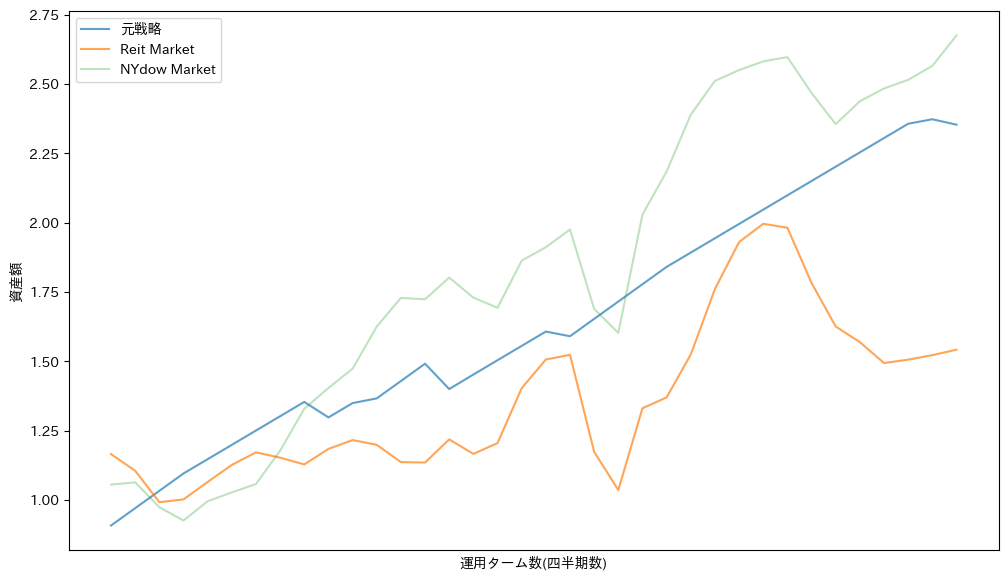

In [32]:
def graph(df, save, file_name, raw_data, NYdow):
    
    NYdow = NYdow.loc['2014-08-01':]
    
    profit = df["Return"].values
    profit2 = raw_data["Return"].values
    profit3 = (NYdow["Return"]).values 
    
    # 単利運用での資産額の計算(初日を1とする)
    total = 1 + np.cumsum(profit) 
    total2 = 1 + np.cumsum(profit2)
    total3 = 1+np.cumsum(profit3) 
    
    # 日ごとのそれまでの最大資産の計算
    max_assets = pd.Series(total).cummax().values 


    indexes = pd.to_datetime(df.index, format="%Y-%m-%d")
    #indexes = [dt.strftime(array[i], format="%Y-%m-%d") if i % 4 == 2 else '' for i in range(len(array))]
    
    fig, ax1 = plt.subplots(figsize=(12, 7))
    ax1.set_xticks(df.index[::10])
    ax1.set_xticklabels(indexes[::10],rotation=45)
    ax1.set_xlabel('運用ターム数(四半期数)')
    ax1.set_ylabel('資産額')
    
    ax1.plot(total, label='元戦略', alpha=0.7)
    ax1.plot(total2, label='Reit Market', alpha=0.7)
    ax1.plot(total3, label='NYdow Market', alpha=0.3)
    
    ax1.legend()
    
    if save:
        fig.savefig(file_name+".png")
graph(df=df,
      save=False,
      file_name='graph',
      raw_data=df3,
     NYdow=dataX)

C:\Users\admin\AppData\Local\Temp\ipykernel_14268\3226756856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predict']= [1 for i in range(len(data))]
C:\Users\admin\AppData\Local\Temp\ipykernel_14268\4112177944.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


(入力前の)シグナルが0なら売ります。
loss_cut: 0 profit_count: 0
totalreturn: [20.14999771] initiate_asset:74.05000305175781


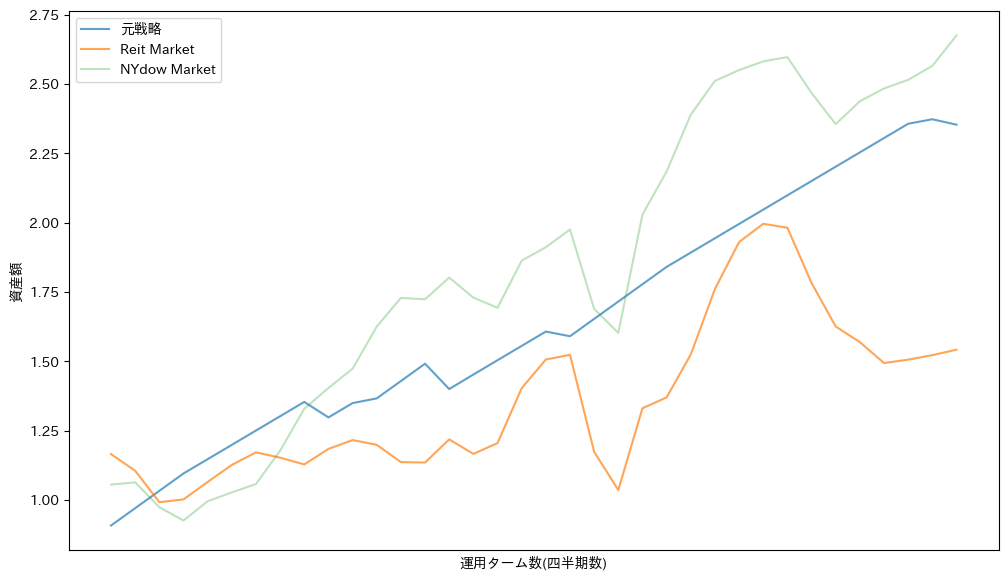

In [36]:
data['predict']= [1 for i in range(len(data))]
c, df3 = calc(data, 1, 1, False,1,1,1, data2)
def graph(df, save, file_name, raw_data, NYdow):
    
    NYdow = NYdow.loc['2012-08-01':]
    
    profit = df["Return"].values
    profit2 = raw_data["Return"].values
    profit3 = (NYdow["Return"]).values 
    
    # 単利運用での資産額の計算(初日を1とする)
    total = 1 + np.cumsum(profit) 
    total2 = 1 + np.cumsum(profit2)
    total3 = 1+np.cumsum(profit3) 
    
    # 日ごとのそれまでの最大資産の計算
    max_assets = pd.Series(total).cummax().values 


    indexes = pd.to_datetime(df.index, format="%Y-%m-%d")
    #indexes = [dt.strftime(array[i], format="%Y-%m-%d") if i % 4 == 2 else '' for i in range(len(array))]
    
    fig, ax1 = plt.subplots(figsize=(12, 7))
    ax1.set_xticks(df.index[::10])
    ax1.set_xticklabels(indexes[::10],rotation=45)
    ax1.set_xlabel('運用ターム数(四半期数)')
    ax1.set_ylabel('資産額')
    
    ax1.plot(total, label='元戦略', alpha=0.7)
    ax1.plot(total2, label='Reit Market', alpha=0.7)
    ax1.plot(total3, label='NYdow Market', alpha=0.3)
    
    ax1.legend()
    
    if save:
        fig.savefig(file_name+".png")
graph(df=df,
      save=False,
      file_name='graph',
      raw_data=df3,
     NYdow=dataX)